#### 라이브러리

In [1]:
#library
import pandas as pd
from datetime import datetime

#visualization
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

#### 데이터 불러오기

In [4]:
df = pd.read_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\character_location_tel0.csv')
df

,_D,character.name,character.location.x,character.location.y,character.location.z,character.isInBlueZone,phase,whitecircle_location_x,whitecircle_location_y,whitecircle_radius
0,11:21:03.132,TL_Jiaoyang,605780.87500,366935.437500,10457.629883,False,1.0,438487.87500,245424.515625,203699.687500
1,11:21:03.133,TL_Jiaoyang,605888.00000,366900.062500,10551.200195,False,1.0,438487.87500,245424.515625,203699.687500
2,11:21:03.651,TL_Jiaoyang,605379.68750,367114.625000,9876.229492,False,1.0,438487.87500,245424.515625,203699.687500
3,11:21:05.326,TL_Jiaoyang,605124.12500,367265.593750,9903.726562,False,1.0,438487.87500,245424.515625,203699.687500
4,11:21:05.448,TL_Jiaoyang,605124.12500,367265.593750,9903.726562,False,1.0,438487.87500,245424.515625,203699.687500
...,...,...,...,...,...,...,...,...,...,...
33828,11:50:45.342,T5_Hatsawat,404608.06250,215308.390625,6225.689941,False,7.0,410221.46875,213685.875000,11076.323242
33829,11:50:49.007,T5_RossitedJR,411438.90625,217228.031250,4704.060059,False,7.0,410221.46875,213685.875000,11076.323242
33830,11:50:52.825,T5_Thanad0l,413216.18750,213688.890625,4371.159668,False,7.0,410221.46875,213685.875000,11076.323242
33831,11:50:53.337,T5_Hatsawat,404608.06250,215308.390625,6225.689941,False,7.0,410221.46875,213685.875000,11076.323242


#### 시각화용 전처리

In [5]:
#float형을 정수형으로 변환
type_change_list = ['character.location.x','character.location.y','character.location.z','whitecircle_location_x','whitecircle_location_y']

for i in type_change_list:
    df[i] = df[i].astype(int)

In [6]:
# whitecircle_location_z 데이터 0으로 추가
df['whitecircle_location_z'] = 0

In [7]:
df

,_D,character.name,character.location.x,character.location.y,character.location.z,character.isInBlueZone,phase,whitecircle_location_x,whitecircle_location_y,whitecircle_radius,whitecircle_location_z
0,11:21:03.132,TL_Jiaoyang,605780,366935,10457,False,1.0,438487,245424,203699.687500,0
1,11:21:03.133,TL_Jiaoyang,605888,366900,10551,False,1.0,438487,245424,203699.687500,0
2,11:21:03.651,TL_Jiaoyang,605379,367114,9876,False,1.0,438487,245424,203699.687500,0
3,11:21:05.326,TL_Jiaoyang,605124,367265,9903,False,1.0,438487,245424,203699.687500,0
4,11:21:05.448,TL_Jiaoyang,605124,367265,9903,False,1.0,438487,245424,203699.687500,0
...,...,...,...,...,...,...,...,...,...,...,...
33828,11:50:45.342,T5_Hatsawat,404608,215308,6225,False,7.0,410221,213685,11076.323242,0
33829,11:50:49.007,T5_RossitedJR,411438,217228,4704,False,7.0,410221,213685,11076.323242,0
33830,11:50:52.825,T5_Thanad0l,413216,213688,4371,False,7.0,410221,213685,11076.323242,0
33831,11:50:53.337,T5_Hatsawat,404608,215308,6225,False,7.0,410221,213685,11076.323242,0


#### 시각화

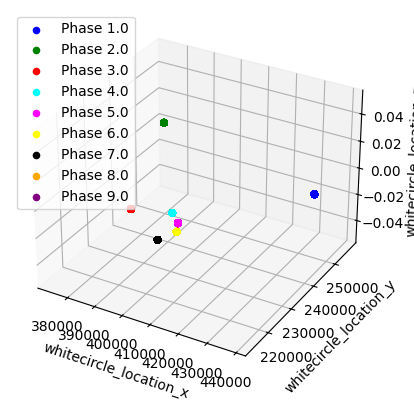

In [8]:
# 3D 시각화 시도 > 'whitecircle_location_z' 값이 0이라 2D로 전환
# 3D는 플레이어들의 z축 분석할 때 써먹을까함

phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']
for phase, color in zip(phase, colors):
    phase_data = df[df['phase'] == phase]
    ax.scatter(phase_data['whitecircle_location_x'], phase_data['whitecircle_location_y'], phase_data['whitecircle_location_z'], color=color, label=f'Phase {phase}')
    
ax.set_xlabel('whitecircle_location_x')
ax.set_ylabel('whitecircle_location_y')
ax.set_zlabel('whitecircle_location_z')
ax.legend()
plt.show()



In [9]:
# 페이즈별 반지름 변화흐름 
df.drop_duplicates(subset='phase')[['phase','whitecircle_radius']]['whitecircle_radius'].to_list()

[203699.6875,
 112034.828125,
 67220.8984375,
 40332.5390625,
 26216.150390625,
 17040.498046875,
 11076.3232421875]

In [10]:
# 페이즈 전처리 후 남은 것 체크
df.drop_duplicates(subset='phase')[['phase','whitecircle_radius']]['phase'].to_list()

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

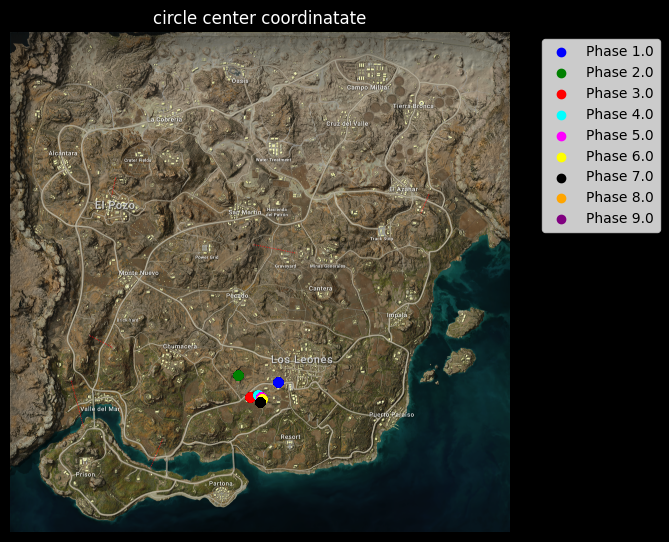

In [23]:
# 중심부 좌표찍기 - 성공
import matplotlib.pyplot as plt
import matplotlib.image as img
from chicken_dinner.constants import map_dimensions

fig = plt.figure(figsize=(5, 5), dpi=100)
fig.set_facecolor('black')  # 바깥 외부 배경 색을 검은색으로 설정

ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Miramar_Main_High_Res.png'
img = mpimg.imread(img_path)
ax.imshow(img, extent=[0, 819200, 0, 819200])

df['phase_rounded'] = df['phase'].round(1)
phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']

for phase, color in zip(phase, colors):
    phase_data = df[df['phase_rounded'] == phase]
    plt.scatter(phase_data['whitecircle_location_x'], phase_data['whitecircle_location_y'], color=color, label=f'Phase {phase}')

plt.xlabel('whitecircle_location_x')
plt.ylabel('whitecircle_location_y')
plt.title('circle center coordinatate', color='w')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)


output_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\figure\circle_center_coordinatate.png'
plt.savefig(output_path, bbox_inches='tight')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


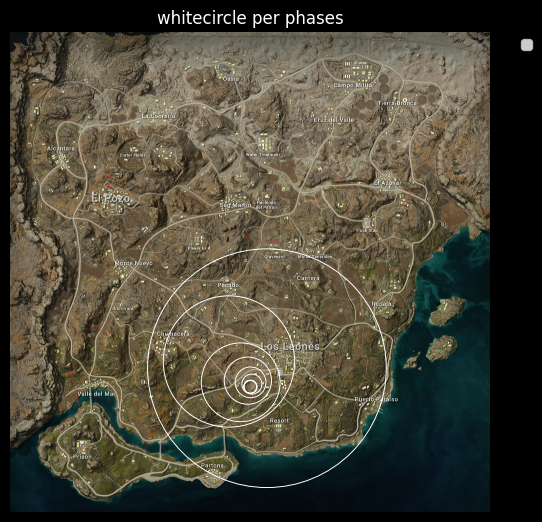

In [21]:
# 안전구역 원 그리기 - 성공
import matplotlib.pyplot as plt
import matplotlib.image as img
from chicken_dinner.constants import map_dimensions

fig = plt.figure()
fig.set_facecolor('black')  # 바깥 외부 배경 색을 검은색으로 설정

ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Miramar_Main_High_Res.png'
img = mpimg.imread(img_path)
ax.imshow(img, extent=[0, 819200, 0, 819200])

df['phase_rounded'] = df['phase'].round(1)
phase = [1.0,2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']

for phase in phase:
    phase_data = df[df['phase_rounded'] == phase]

    if not phase_data.empty:
      x = phase_data['whitecircle_location_x'].iloc[0]
      y = phase_data['whitecircle_location_y'].iloc[0]
      radius = phase_data['whitecircle_radius'].iloc[0]

    white_circle = plt.Circle((x,y),radius, edgecolor="w", linewidth=0.7, fill=False, zorder=5)
    ax.add_patch(white_circle)

plt.xlabel('whitecircle_location_x')
plt.ylabel('whitecircle_location_y')
plt.title('whitecircle per phases', color='w')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

output_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\figure\whitecircle per phases.png'
plt.savefig(output_path, bbox_inches='tight')

plt.show()

In [ ]:
# 안전구역 원과 중심부 좌표 같이 표시 - 성공

import matplotlib.pyplot as plt
import matplotlib.image as img
from chicken_dinner.constants import map_dimensions
# Figure 생성
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
# 이미지 로드
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Miramar_Main_High_Res.png'
img = mpimg.imread(img_path)
ax.imshow(img, extent=[0, 819200, 0, 819200])
# 데이터 전처리
df['phase_rounded'] = df['phase'].round(1)
phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']
# 각 단계별로 중심부 표시 및 안전구역 그리기
for phase, color in zip(phase, colors):
    phase_data = df[df['phase_rounded'] == phase]
    if not phase_data.empty:
        x = phase_data['whitecircle_location_x'].iloc[0]
        y = phase_data['whitecircle_location_y'].iloc[0]
        radius = phase_data['whitecircle_radius'].iloc[0]
        # 중심부 좌표 표시
        plt.scatter(x, y, color=color, label=f'Phase {phase}', s=8)
        # 안전구역 그리기
        white_circle = plt.Circle((x, y), radius, edgecolor="w", linewidth=0.7, fill=False, zorder=5)
        ax.add_patch(white_circle)
plt.xlabel('whitecircle_location_x')
plt.ylabel('whitecircle_location_y')
plt.title('whitecircle per phase')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

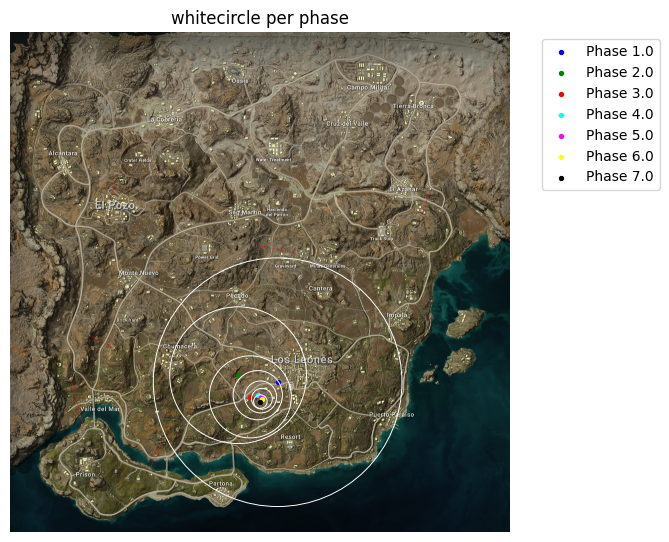

In [ ]:
# 안전구역 원과 중심부 좌표 같이 표시 - 성공

import matplotlib.pyplot as plt
import matplotlib.image as img
from chicken_dinner.constants import map_dimensions
# Figure 생성
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
# 이미지 로드
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Miramar_Main_High_Res.png'
img = mpimg.imread(img_path)
ax.imshow(img, extent=[0, 819200, 0, 819200])
# 데이터 전처리
df['phase_rounded'] = df['phase'].round(1)
phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']
# 각 단계별로 중심부 표시 및 안전구역 그리기
for phase, color in zip(phase, colors):
    phase_data = df[df['phase_rounded'] == phase]
    if not phase_data.empty:
        x = phase_data['whitecircle_location_x'].iloc[0]
        y = phase_data['whitecircle_location_y'].iloc[0]
        radius = phase_data['whitecircle_radius'].iloc[0]
        # 중심부 좌표 표시
        plt.scatter(x, y, color=color, label=f'Phase {phase}', s=8)
        # 안전구역 그리기
        white_circle = plt.Circle((x, y), radius, edgecolor="w", linewidth=0.7, fill=False, zorder=5)
        ax.add_patch(white_circle)
plt.xlabel('whitecircle_location_x')
plt.ylabel('whitecircle_location_y')
plt.title('whitecircle per phase')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
!pip install Pillow
!pip install ffmpeg

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


애니메이션 GIF 파일이 성공적으로 생성되었습니다: C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\phase_circle_animation.gif


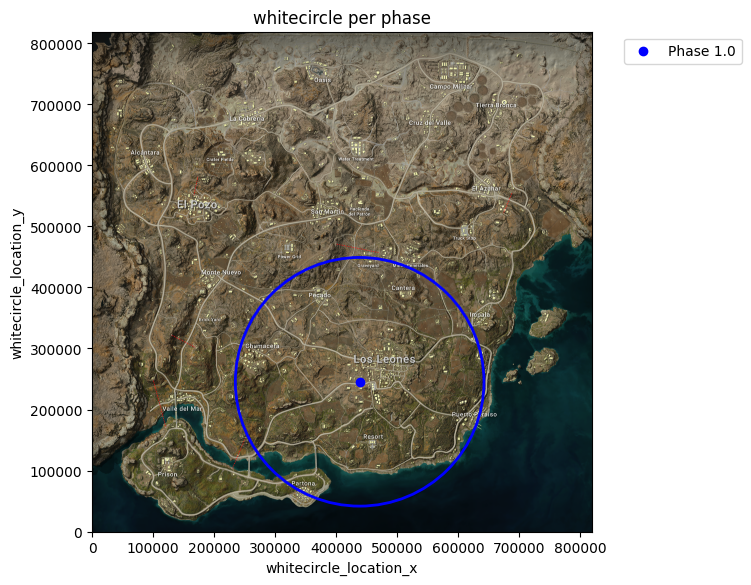

In [22]:
# 중심부 좌표와 안전구역 그리고 애니메이션화 - gif만 성공

# 이미지 로드
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Miramar_Main_High_Res.png'
base_img = mpimg.imread(img_path)
# Figure 생성
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
# 데이터 전처리
df['phase_rounded'] = df['phase'].round(1)
phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']

def draw_phase(i):
    ax.clear()
    ax.imshow(base_img, extent=[0, 819200, 0, 819200])
    phase_data = df[df['phase_rounded'] == phase[i]]
    if not phase_data.empty:
        x = phase_data['whitecircle_location_x'].iloc[0]
        y = phase_data['whitecircle_location_y'].iloc[0]
        radius = phase_data['whitecircle_radius'].iloc[0]
        # 중심부 좌표 표시 및 레이블 할당
        ax.scatter(x, y, color=colors[i], label=f'Phase {phase[i]}')
        # 안전구역 그리기
        white_circle = plt.Circle((x, y), radius, edgecolor=colors[i], linewidth=2, fill=False)
        ax.add_patch(white_circle)
    ax.set_xlabel('whitecircle_location_x')
    ax.set_ylabel('whitecircle_location_y')
    ax.set_title('whitecircle per phase')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 애니메이션 생성
ani = animation.FuncAnimation(fig, draw_phase, frames=len(phase), repeat=True)

# GIF 형식으로 저장
gif_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\phase_circle_animation.gif'

ani.save(gif_path, writer=PillowWriter(fps=7))

# GIF 파일 생성 확인
if os.path.exists(gif_path):
    print(f"애니메이션 GIF 파일이 성공적으로 생성되었습니다: {gif_path}")
else:
    print("애니메이션 GIF 파일 생성에 실패했습니다.")

MovieWriter ffmpeg unavailable; using Pillow instead.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: unknown file extension: .mp4

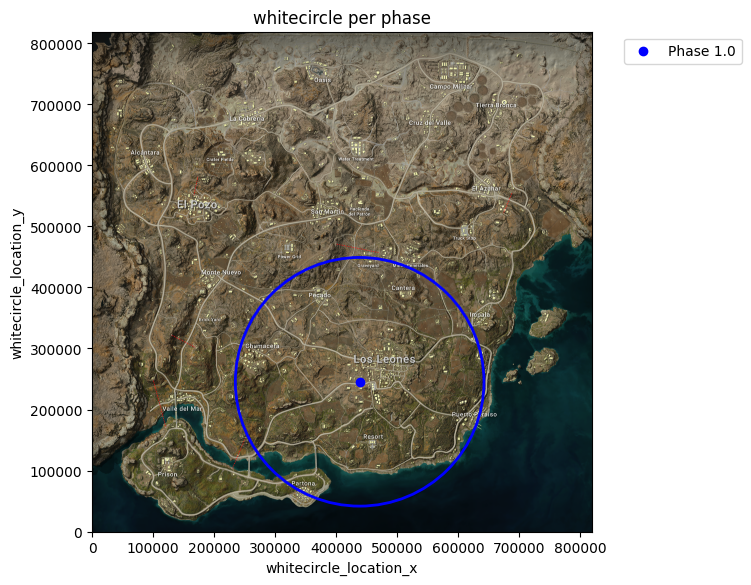

In [ ]:
# 중심부 좌표와 안전구역 그리고 애니메이션화 - mp4로도 같이 뽑기 > 오류발생하여 추후 시각화 중점할 때 다룰 예정

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.animation import PillowWriter
import pandas as pd

# 이미지 로드
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Miramar_Main_High_Res.png'
base_img = mpimg.imread(img_path)
# Figure 생성
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
# 데이터 전처리
df['phase_rounded'] = df['phase'].round(1)
phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']

def draw_phase(i):
    ax.clear()
    ax.imshow(base_img, extent=[0, 819200, 0, 819200])
    phase_data = df[df['phase_rounded'] == phase[i]]
    if not phase_data.empty:
        x = phase_data['whitecircle_location_x'].iloc[0]
        y = phase_data['whitecircle_location_y'].iloc[0]
        radius = phase_data['whitecircle_radius'].iloc[0]
        # 중심부 좌표 표시 및 레이블 할당
        ax.scatter(x, y, color=colors[i], label=f'Phase {phase[i]}')
        # 안전구역 그리기
        white_circle = plt.Circle((x, y), radius, edgecolor=colors[i], linewidth=2, fill=False)
        ax.add_patch(white_circle)
    ax.set_xlabel('whitecircle_location_x')
    ax.set_ylabel('whitecircle_location_y')
    ax.set_title('whitecircle per phase')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 애니메이션 생성
ani = animation.FuncAnimation(fig, draw_phase, frames=len(phase), repeat=True)

# MP4 형식으로 애니메이션 저장
mp4_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\animation.mp4'
ani.save(mp4_path, writer='ffmpeg', fps=20)

# GIF 형식으로도 저장
gif_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\animation.gif'
ani.save(gif_path, writer=PillowWriter(fps=20))

# 파일 생성 확인
if os.path.exists(mp4_path):
    print(f"애니메이션 MP4 파일이 성공적으로 생성되었습니다: {mp4_path}")
else:
    print("애니메이션 MP4 파일 생성에 실패했습니다.")
if os.path.exists(gif_path):
    print(f"애니메이션 GIF 파일이 성공적으로 생성되었습니다: {gif_path}")
else:
    print("애니메이션 GIF 파일 생성에 실패했습니다.")